In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import textblob as txt
from textblob import TextBlob
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
trump = pd.read_csv("Trumpall2.csv")
biden = pd.read_csv("Bidenall2.csv")




In [3]:
print(trump.shape)
print(biden.shape)

(2788, 2)
(2540, 2)


In [4]:
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [5]:
print(trump["text"][100])


 Thank you President Trump for all you are doing to help the American people. First President in hi… https://t.co/MndKc1gtJB


In [6]:
TextBlob(trump['text'][100]).sentiment

Sentiment(polarity=0.125, subjectivity=0.16666666666666666)

In [7]:
def pol(text):
    return TextBlob(text).sentiment.polarity

In [8]:
trump["Polarity"]=trump["text"].apply(pol)
biden["Polarity"]=biden["text"].apply(pol)

In [9]:
trump.head()

,user,text,Polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...,0.50
4,James09254677,After 4 years you think you would have figure...,0.00


In [10]:
biden.tail()

,user,text,Polarity
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20


In [11]:
trump["sentiment"]=np.where(trump["Polarity"]>0,"Positive","Negative")
trump["sentiment"][trump["Polarity"]==0]="Neutral"
trump.tail()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15540\1048023970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump["sentiment"][trump["Polarity"]==0]="Neutral"


,user,text,Polarity,sentiment
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,Positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,Negative


In [12]:
biden["sentiment"]=np.where(biden["Polarity"]>0,"Positive","Negative")
biden["sentiment"][biden["Polarity"]==0]="Neutral"
biden.tail()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15540\508246165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden["sentiment"][biden["Polarity"]==0]="Neutral"


,user,text,Polarity,sentiment
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,Positive
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,Positive
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20,Positive


# Deleting Neutral Tweets

In [17]:


trump.drop(trump[trump["Polarity"]==0].index, inplace= True)

print(trump.shape)
biden.drop(biden[biden["Polarity"]==0].index, inplace= True)

print(biden.shape)

(1324, 4)
(1031, 4)


In [25]:
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(trump.index, size=293, replace=False)
trump = trump.drop(index=arr_indices_top_drop)

In [26]:
print(trump.shape)
print(biden.shape)

(1031, 4)
(1031, 4)


In [31]:
trump.groupby('sentiment').count()

,user,text,Polarity
sentiment,,,
Negative,465,465,465
Positive,566,566,566


In [32]:
biden.groupby('sentiment').count()

,user,text,Polarity
sentiment,,,
Negative,407,407,407
Positive,624,624,624


In [37]:
def pol_percent(subset,total):
    negative_percent = ((subset.groupby('sentiment').count())['Polarity'][0]/total)*100
    positive_percent = ((subset.groupby('sentiment').count())['Polarity'][1]/total)*100
    
    return negative_percent,positive_percent

In [38]:
trump_pol_percent = pol_percent(trump,2062)
print(trump_pol_percent)
biden_pol_percent = pol_percent(biden,2062)
print(biden_pol_percent)

(22.550921435499514, 27.449078564500486)
(19.73811833171678, 30.26188166828322)


In [39]:
trump_total_percent = pol_percent(trump,4124)
trump_total_percent

(11.275460717749757, 13.724539282250243)

In [41]:
biden_total_percent = pol_percent(biden,4124)
print(biden_total_percent)

(9.86905916585839, 15.13094083414161)


# Winning Percent

In [65]:
trump_positive = trump_total_percent[1] + biden_total_percent[0]
print("Winning Percent of Trump =",trump_positive)
biden_positive = biden_total_percent[1] + trump_total_percent[0]
print("Winning Percent of Biden =",biden_positive)

Winning Percent of Trump = 23.593598448108633
Winning Percent of Biden = 26.406401551891367


# Most Frequent Words Used in Tweets for Trump

there have172973 words in all text


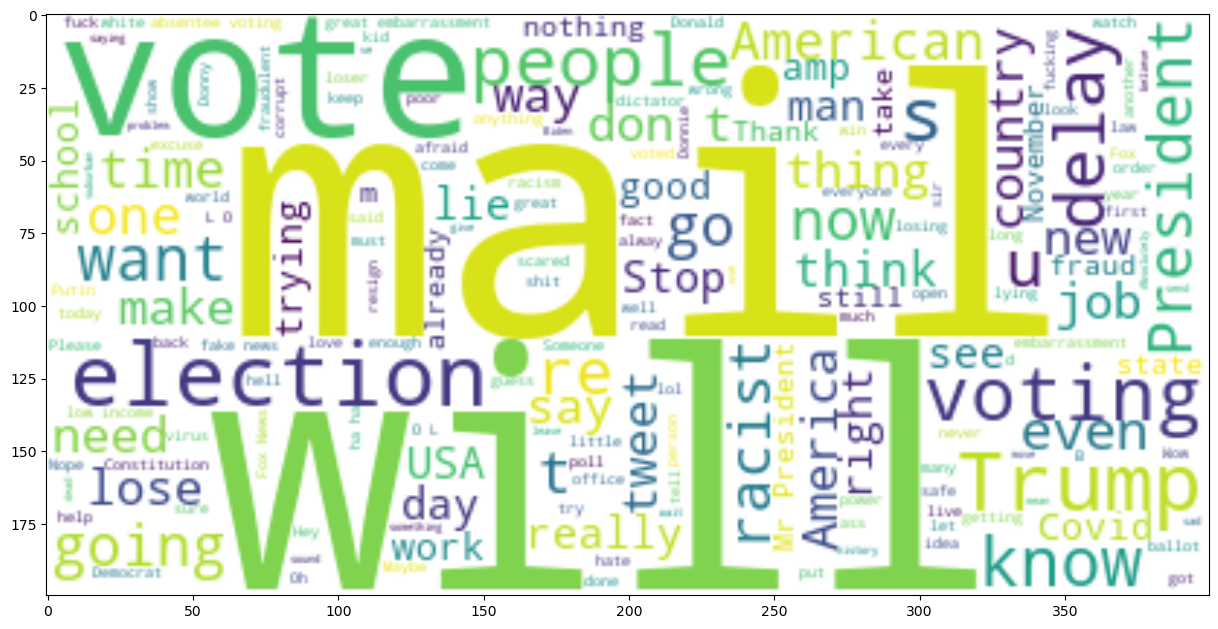

In [61]:
text=" ".join(text for text in trump.text)
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)


print("there have{} words in all text".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')

# Most Frequent Words Used in Tweets for Biden

there have154722 words in all text


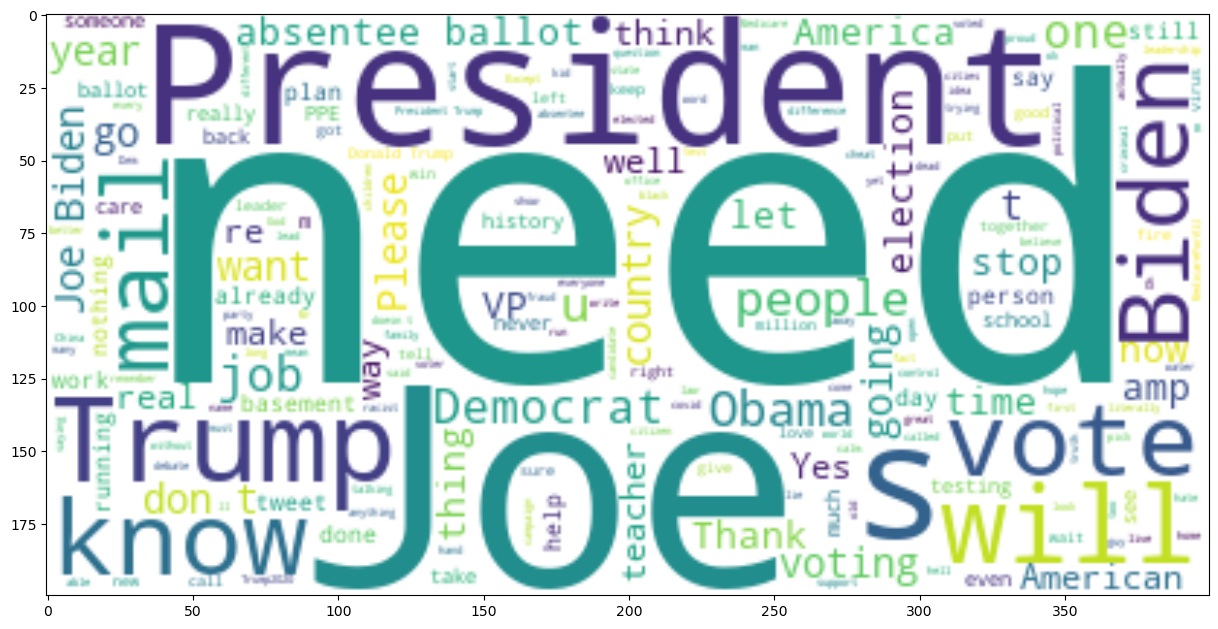

In [63]:
text=" ".join(text for text in biden.text)
text=" ".join(filter(lambda x:x[0]!='@', text.split()))
import re
text=re.sub(r"http\S+", "", text)


print("there have{} words in all text".format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize =(15,10))
plt.imshow(WC, interpolation='bilinear')